# EDA for **Autism** Before and After Pandemic

## Import packages

In [1]:
import pandas as pd
import numpy as np
import altair as alt
alt.data_transformers.enable('data_server')
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

## Import data set

In [2]:
autism_pre = pd.read_csv('../../data/autism_pre_features_tfidf_256.csv')
autism_post = pd.read_csv('../../data/autism_post_features_tfidf_256.csv')

## Filter feature of interest: substance_use_total

In [3]:
autism_pre = autism_pre .loc[:, ['subreddit', 'author', 'date', 'post', 'substance_use_total']]
autism_post = autism_post.loc[:, ['subreddit', 'author', 'date', 'post', 'substance_use_total']]

## Pre-Pandemic data set

In [4]:
autism_pre.head(5)

,subreddit,author,date,post,substance_use_total
0,autism,Truly_Tobi,2019/07/13,I think I might have autism but my parents ref...,0
1,autism,Forzafanboy4,2019/07/13,Shouting out Sometimes I shout out random thin...,0
2,autism,GoldenHoneyCyclops,2019/07/13,The wisdom teeth removal experience IF YOU DO ...,0
3,autism,AOneGirlRevolution,2019/07/13,Looking for constructive criticism from other ...,0
4,autism,AristotelesRocks,2019/07/13,Sheldon from The Big Bang Theory isn’t on the ...,0


In [5]:
autism_post.tail(5)

,subreddit,author,date,post,substance_use_total
2204,autism,AWordBully,2020/04/20,I easily get overwhelmed by stress and informa...,0
2205,autism,Ranza27,2020/04/20,So how are you all dealing with quarantine? It...,0
2206,autism,quinnie55,2020/04/20,I had my first full 2 hour siezure-like meltdo...,2
2207,autism,SullenTerror,2020/04/20,"So i havent masked in 4 years, and i feel grea...",0
2208,autism,alwaysn00b,2020/04/20,What is your de-escalation strategy for when f...,0


In [6]:
print(f'Total number of records in the pre-pandemic dataset: {len(autism_pre)}')

Total number of records in the pre-pandemic dataset: 4576


## Post-Pandemic data set

In [7]:
autism_post.head(5)

,subreddit,author,date,post,substance_use_total
0,autism,Leafkage,2020/01/01,I cant live with autism Im 14 years old and i ...,1
1,autism,foofohy,2020/01/01,I have a question How do you know that you are...,0
2,autism,connor_the_metalhead,2020/01/01,Advice for Someone with Sensory Food Aversions...,1
3,autism,LJamH,2020/01/01,I was diagnosed with autism at 16 and hid from...,0
4,autism,Kinaibhlan,2020/01/01,Social cues you understand and still hate Whic...,2


In [8]:
autism_post.tail(5)

,subreddit,author,date,post,substance_use_total
2204,autism,AWordBully,2020/04/20,I easily get overwhelmed by stress and informa...,0
2205,autism,Ranza27,2020/04/20,So how are you all dealing with quarantine? It...,0
2206,autism,quinnie55,2020/04/20,I had my first full 2 hour siezure-like meltdo...,2
2207,autism,SullenTerror,2020/04/20,"So i havent masked in 4 years, and i feel grea...",0
2208,autism,alwaysn00b,2020/04/20,What is your de-escalation strategy for when f...,0


In [9]:
print(f'Total number of records in the post-pandemic dataset: {len(autism_post)}')

Total number of records in the post-pandemic dataset: 2209


## High Level Analysis of Pre and Post Pandemic datasets

First we'll combine the two dataset into one--which will make it easier to compare:

In [10]:
autism_pre['period'] = 'pre'
autism_post['period'] = 'post'

autism_df = pd.concat([autism_pre, autism_post])
autism_df

,subreddit,author,date,post,substance_use_total,period
0,autism,Truly_Tobi,2019/07/13,I think I might have autism but my parents ref...,0,pre
1,autism,Forzafanboy4,2019/07/13,Shouting out Sometimes I shout out random thin...,0,pre
2,autism,GoldenHoneyCyclops,2019/07/13,The wisdom teeth removal experience IF YOU DO ...,0,pre
3,autism,AOneGirlRevolution,2019/07/13,Looking for constructive criticism from other ...,0,pre
4,autism,AristotelesRocks,2019/07/13,Sheldon from The Big Bang Theory isn’t on the ...,0,pre
...,...,...,...,...,...,...
2204,autism,AWordBully,2020/04/20,I easily get overwhelmed by stress and informa...,0,post
2205,autism,Ranza27,2020/04/20,So how are you all dealing with quarantine? It...,0,post
2206,autism,quinnie55,2020/04/20,I had my first full 2 hour siezure-like meltdo...,2,post
2207,autism,SullenTerror,2020/04/20,"So i havent masked in 4 years, and i feel grea...",0,post


In [13]:
pd.concat([autism_pre.describe(), autism_post.describe()], axis=1)

,substance_use_total,substance_use_total
count,4576.000000,2209.000000
mean,0.369755,0.333182
std,0.877699,0.800469
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,18.000000,12.000000


### Visualization

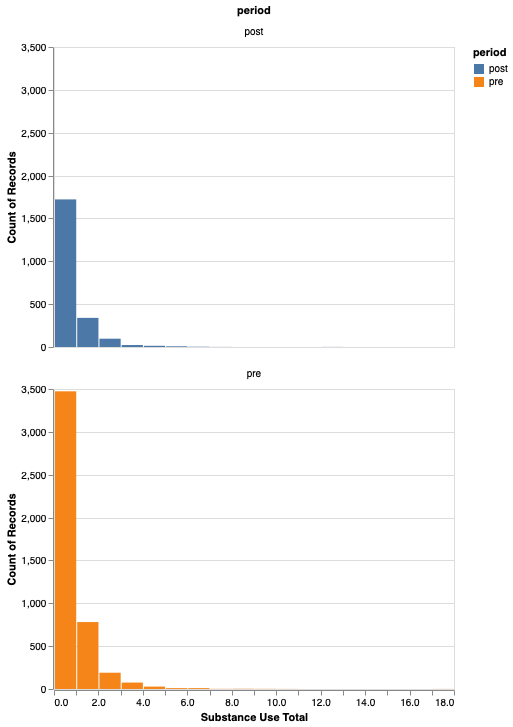

In [15]:
alt.Chart(autism).mark_bar().encode(
    x=alt.X('substance_use_total', bin=alt.Bin(maxbins=20), title = 'Substance Use Total'),
    y='count()',
    color='period'
).facet('period', columns=1)

In [17]:
print(f"Number of unique authors (posters) in 'pre' dataset: {len(autism_pre.author.unique())}")
print(f"Number of unique authors (posters) in 'post' dataset: {len(autism_post.author.unique())}")

Number of unique authors (posters) in 'pre' dataset: 4576
Number of unique authors (posters) in 'post' dataset: 2209


1. Every records in the dataset is associated with an unique author
2. The number of unique authors before the pandemic is more than after pandemic
3. The mean of the substance use total before pandemic is slightly higher than after pandemic